# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [5]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid={'pca__n_components':[2,10,30,40,50,63],
          'logistic__alpha':[10,1,0.1,0.01]}
search=GridSearchCV(pipe,param_grid,cv=5,return_train_score=False)
search.fit(X_digits,y_digits)
print('best_score={}'.format(search.best_score_))
print('best param={}'.format(search.best_params_))

best_score=0.9065108514190318
best param={'logistic__alpha': 0.01, 'pca__n_components': 30}


Text(0, 0.5, 'variance ratio')

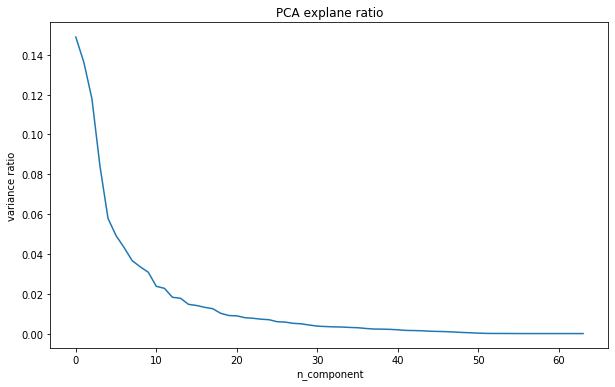

In [11]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

plt.figure(figsize=(10,6))
plt.plot(range(64),pca.explained_variance_ratio_)
plt.title('PCA explane ratio')
plt.xlabel('n_component')
plt.ylabel('variance ratio')

In [ ]:
# 繪製不同採樣點的分類正確率


In [33]:
results=pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
result=results.groupby(components_col)
print(result['mean_test_score'].max())

param_pca__n_components
2     0.555927
10    0.882026
30    0.906511
40    0.899833
50    0.898164
63    0.893712
Name: mean_test_score, dtype: float64


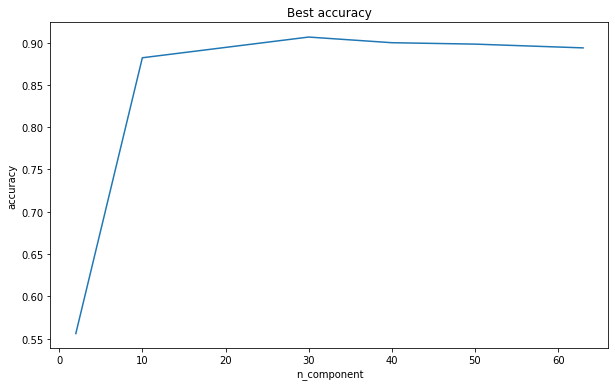

In [36]:
plt.figure(figsize=(10,6))
plt.plot([2,10,30,40,50,63], result['mean_test_score'].max())
plt.title('Best accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_component')
plt.show()